# Relative Strength Indicator (RSI)

-  RSI is a leading momentum indicator which helps in identifying a trend reversal.
-  Measures Speed and Change of Price Movements
-  It shows the internal strength of the asset
-  RSI value oscillates between 0 and 100. It helps identify oversold and overbought price areas.
-  It gives out the strongest signals during periods of sideways and non-trending ranges.

<div>
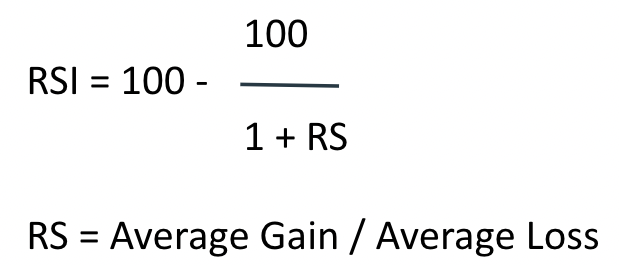
</div>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("nifty.csv", parse_dates=["date"], index_col="date")
df.reset_index(inplace=True)
df.drop('open', inplace=True, axis='columns')
df.drop('low', inplace=True, axis='columns')
df.drop('high', inplace=True, axis='columns')
df.head(2)

,date,close
0,2010-01-04,5232
1,2010-01-05,5278


In [23]:
df['Gains'] = np.where(df.close > df.close.shift(1), df.close - df.close.shift(1),0)
df['Losses'] = np.where(df.close.shift(1) > df.close, df.close.shift(1) - df.close, 0)
df = df[1:]
df.head()

,date,close,Gains,Losses
1,2010-01-05,5278,46.0,0.0
2,2010-01-06,5282,4.0,0.0
3,2010-01-07,5263,0.0,19.0
4,2010-01-08,5245,0.0,18.0
5,2010-01-11,5249,4.0,0.0


In [24]:
range_period = 14
df['AvgGain'] = None
df['AvgLoss'] = None
df.at[range_period + 1,'AvgGain'] = df.Gains[:14].mean()
df.at[range_period + 1,'AvgLoss'] = df.Losses[:14].mean()
df.head(20)

,date,close,Gains,Losses,AvgGain,AvgLoss
1,2010-01-05,5278,46.0,0.0,None,None
2,2010-01-06,5282,4.0,0.0,None,None
3,2010-01-07,5263,0.0,19.0,None,None
4,2010-01-08,5245,0.0,18.0,None,None
5,2010-01-11,5249,4.0,0.0,None,None
6,2010-01-12,5210,0.0,39.0,None,None
7,2010-01-13,5234,24.0,0.0,None,None
8,2010-01-14,5260,26.0,0.0,None,None
9,2010-01-15,5252,0.0,8.0,None,None
10,2010-01-18,5275,23.0,0.0,None,None


In [25]:
df = df[14:].reset_index()
df.drop('index', axis='columns', inplace=True)
df.head(5)

,date,close,Gains,Losses,AvgGain,AvgLoss
0,2010-01-25,5008,0.0,28.0,9.071429,23.071429
1,2010-01-27,4853,0.0,155.0,None,None
2,2010-01-28,4867,14.0,0.0,None,None
3,2010-01-29,4882,15.0,0.0,None,None
4,2010-02-01,4900,18.0,0.0,None,None


In [26]:
for i in range(1, len(df)):
    df.at[i,'AvgGain'] = (df.AvgGain[i-1] * (range_period - 1) + df.Gains[i])/range_period
    df.at[i,'AvgLoss'] = (df.AvgLoss[i-1] * (range_period - 1) + df.Losses[i])/range_period
df.head(10)

,date,close,Gains,Losses,AvgGain,AvgLoss
0,2010-01-25,5008,0.0,28.0,9.071429,23.071429
1,2010-01-27,4853,0.0,155.0,8.423469,32.494898
2,2010-01-28,4867,14.0,0.0,8.821793,30.173834
3,2010-01-29,4882,15.0,0.0,9.263094,28.01856
4,2010-02-01,4900,18.0,0.0,9.887158,26.017234
5,2010-02-02,4830,0.0,70.0,9.180933,29.15886
6,2010-02-03,4932,102.0,0.0,15.810866,27.076085
7,2010-02-04,4845,0.0,87.0,14.681518,31.356364
8,2010-02-05,4719,0.0,126.0,13.632839,38.116624
9,2010-02-06,4757,38.0,0.0,15.37335,35.394008


In [27]:
df['Rel_Strength'] = df.AvgGain / df.AvgLoss
df.head(5)

,date,close,Gains,Losses,AvgGain,AvgLoss,Rel_Strength
0,2010-01-25,5008,0.0,28.0,9.071429,23.071429,0.393189
1,2010-01-27,4853,0.0,155.0,8.423469,32.494898,0.259224
2,2010-01-28,4867,14.0,0.0,8.821793,30.173834,0.292366
3,2010-01-29,4882,15.0,0.0,9.263094,28.01856,0.330606
4,2010-02-01,4900,18.0,0.0,9.887158,26.017234,0.380023


In [28]:
df['RSI'] = (100 - 100 / (1 + df.Rel_Strength)).astype(int)
df.head(5)

,date,close,Gains,Losses,AvgGain,AvgLoss,Rel_Strength,RSI
0,2010-01-25,5008,0.0,28.0,9.071429,23.071429,0.393189,28
1,2010-01-27,4853,0.0,155.0,8.423469,32.494898,0.259224,20
2,2010-01-28,4867,14.0,0.0,8.821793,30.173834,0.292366,22
3,2010-01-29,4882,15.0,0.0,9.263094,28.01856,0.330606,24
4,2010-02-01,4900,18.0,0.0,9.887158,26.017234,0.380023,27


In [29]:
df.set_index('date', inplace=True)
df

,close,Gains,Losses,AvgGain,AvgLoss,Rel_Strength,RSI
date,,,,,,,
2010-01-25,5008,0.0,28.0,9.071429,23.071429,0.393189,28
2010-01-27,4853,0.0,155.0,8.423469,32.494898,0.259224,20
2010-01-28,4867,14.0,0.0,8.821793,30.173834,0.292366,22
2010-01-29,4882,15.0,0.0,9.263094,28.01856,0.330606,24
2010-02-01,4900,18.0,0.0,9.887158,26.017234,0.380023,27
...,...,...,...,...,...,...,...
2022-07-13,15967,0.0,91.0,56.18357,56.879488,0.987765,49
2022-07-14,15939,0.0,28.0,52.170458,54.816668,0.951726,48
2022-07-15,16049,110.0,0.0,56.30114,50.901191,1.106087,52


Text(0.5, 1.0, 'RSI')

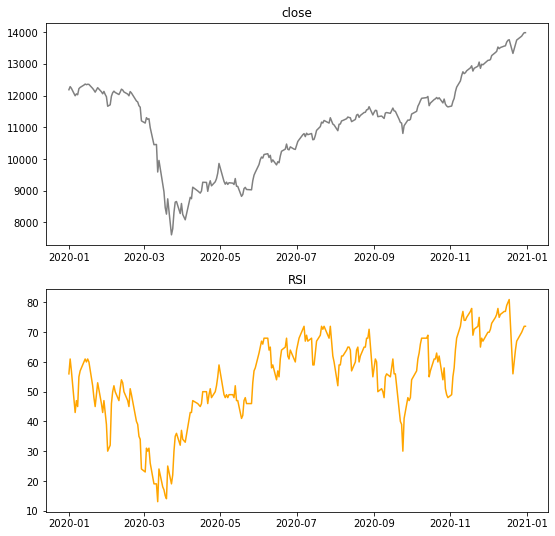

In [30]:
d = df.loc['2020'][['close','RSI']]
RSI = d['RSI'].tolist()
close = d['close'].tolist()
index = d.index.tolist()

fg = plt.figure(figsize=(9, 9))  
plt.subplot(2, 1, 1)
plt.plot(index, close, label ='close', color='gray')
plt.title("close")
plt.subplot(2, 1, 2)
plt.plot(index, RSI, label='RSI', c='Orange')
plt.title("RSI")